In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os



In [2]:
os.chdir('..')
os.chdir('..')

In [3]:
!pwd

/home/ayush/Ayush/Internship/Medical


In [4]:
df= pd.read_csv('data/heart_statlog_cleveland_hungary_final.csv')

In [5]:
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [6]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [9]:
df[df.columns].nunique()

age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64

In [10]:
cat_cols=df.columns[df.nunique()<=4]

In [11]:
cat_cols

Index(['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg',
       'exercise angina', 'ST slope', 'target'],
      dtype='object')

In [12]:
for cols in cat_cols:
    print(cols)

sex
chest pain type
fasting blood sugar
resting ecg
exercise angina
ST slope
target


In [13]:
for cat in cat_cols:
    val=df[cat].nunique()
    print(f"{cat}: {val} ",end='')
    print(df[cat].unique())


sex: 2 [1 0]
chest pain type: 4 [2 3 4 1]
fasting blood sugar: 2 [0 1]
resting ecg: 3 [0 1 2]
exercise angina: 2 [0 1]
ST slope: 4 [1 2 3 0]
target: 2 [0 1]


In [14]:
for col in cat_cols:
    print(df[col].value_counts())
    # print(f"here is the total count:{len(df[col].value_counts())}")
    print("======================")

sex
1    909
0    281
Name: count, dtype: int64
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
exercise angina
0    729
1    461
Name: count, dtype: int64
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64
target
1    629
0    561
Name: count, dtype: int64


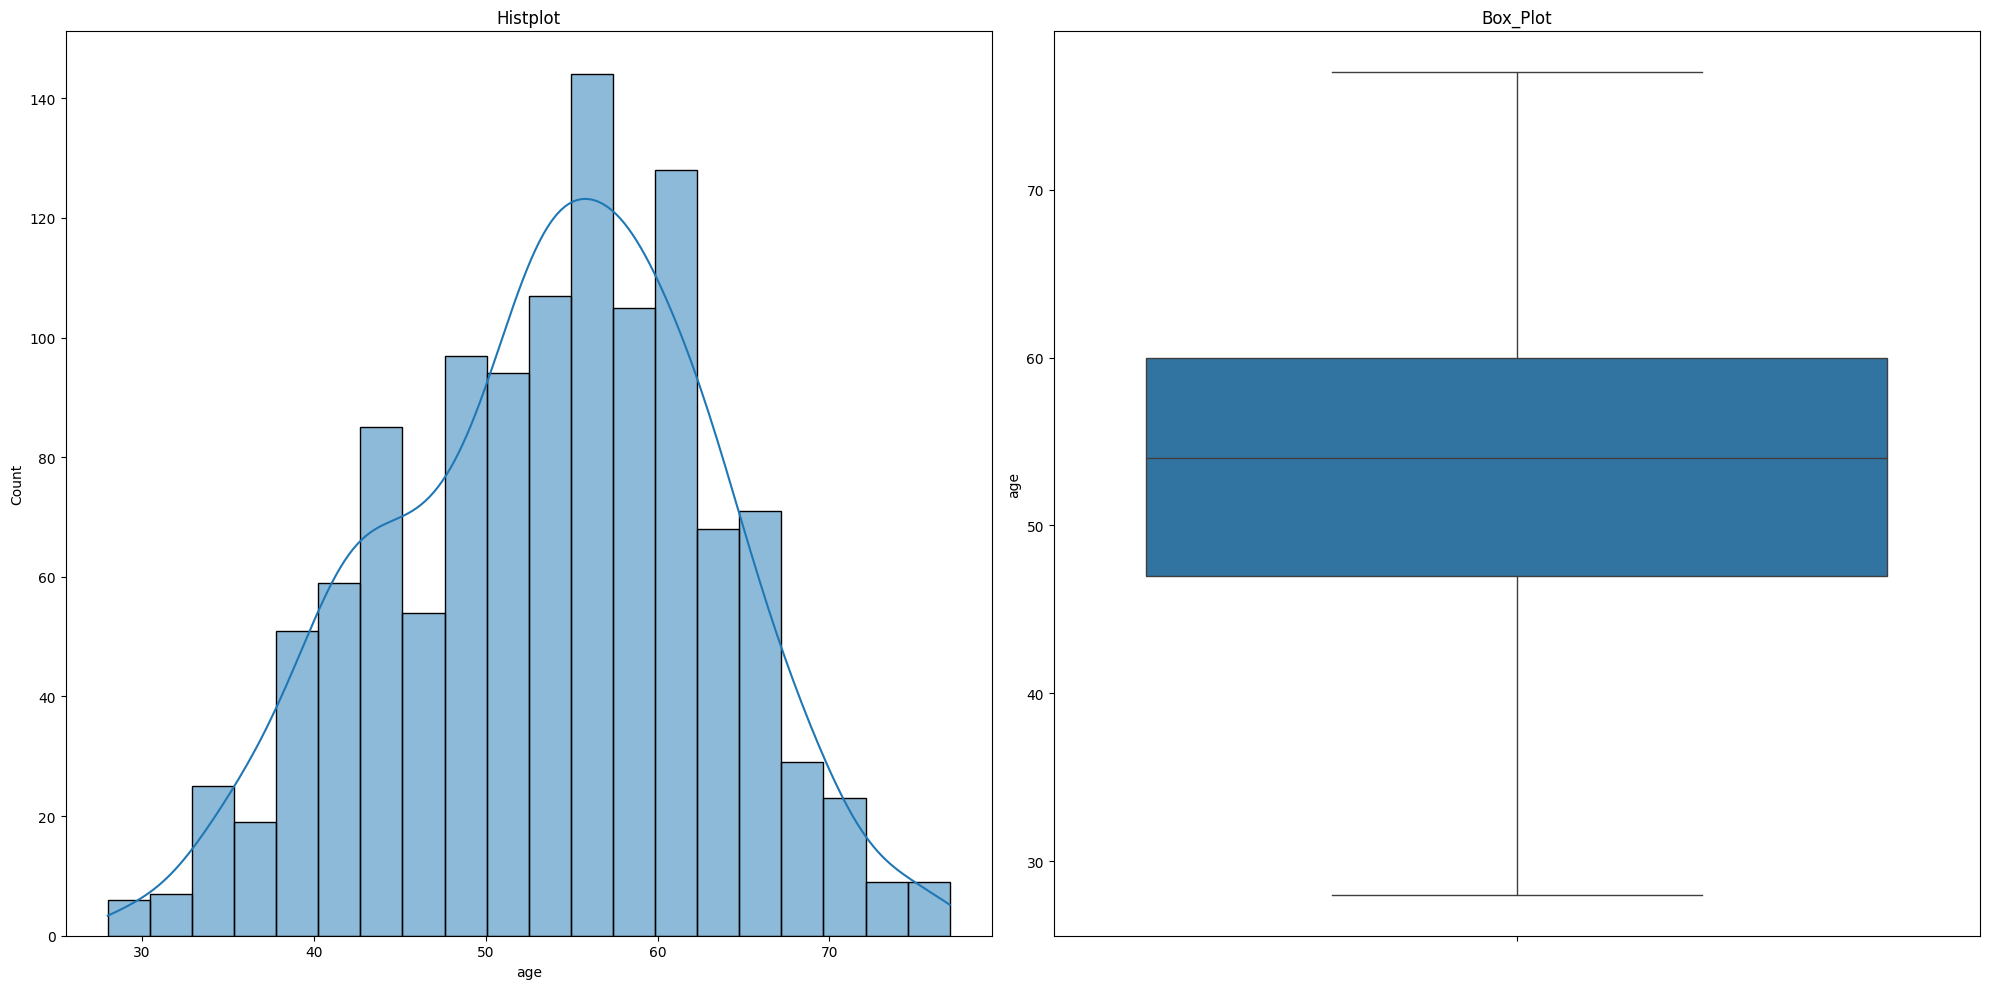

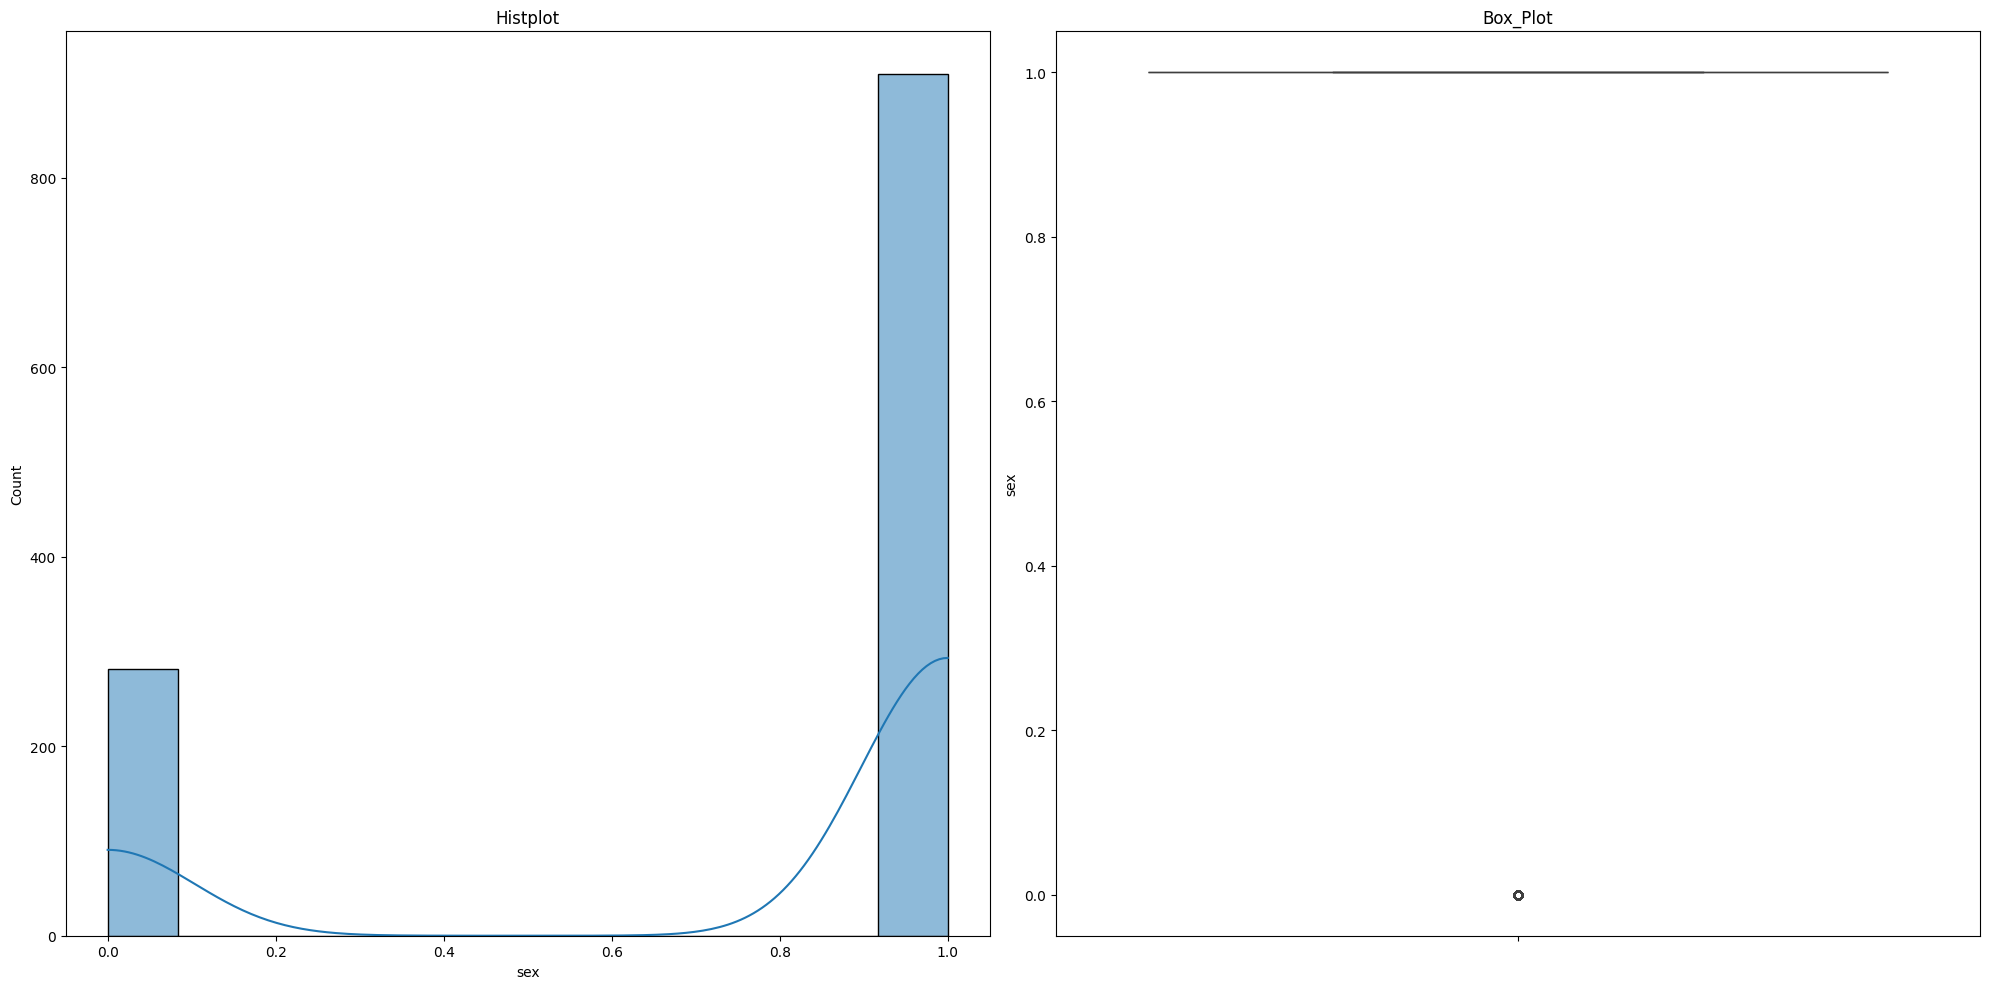

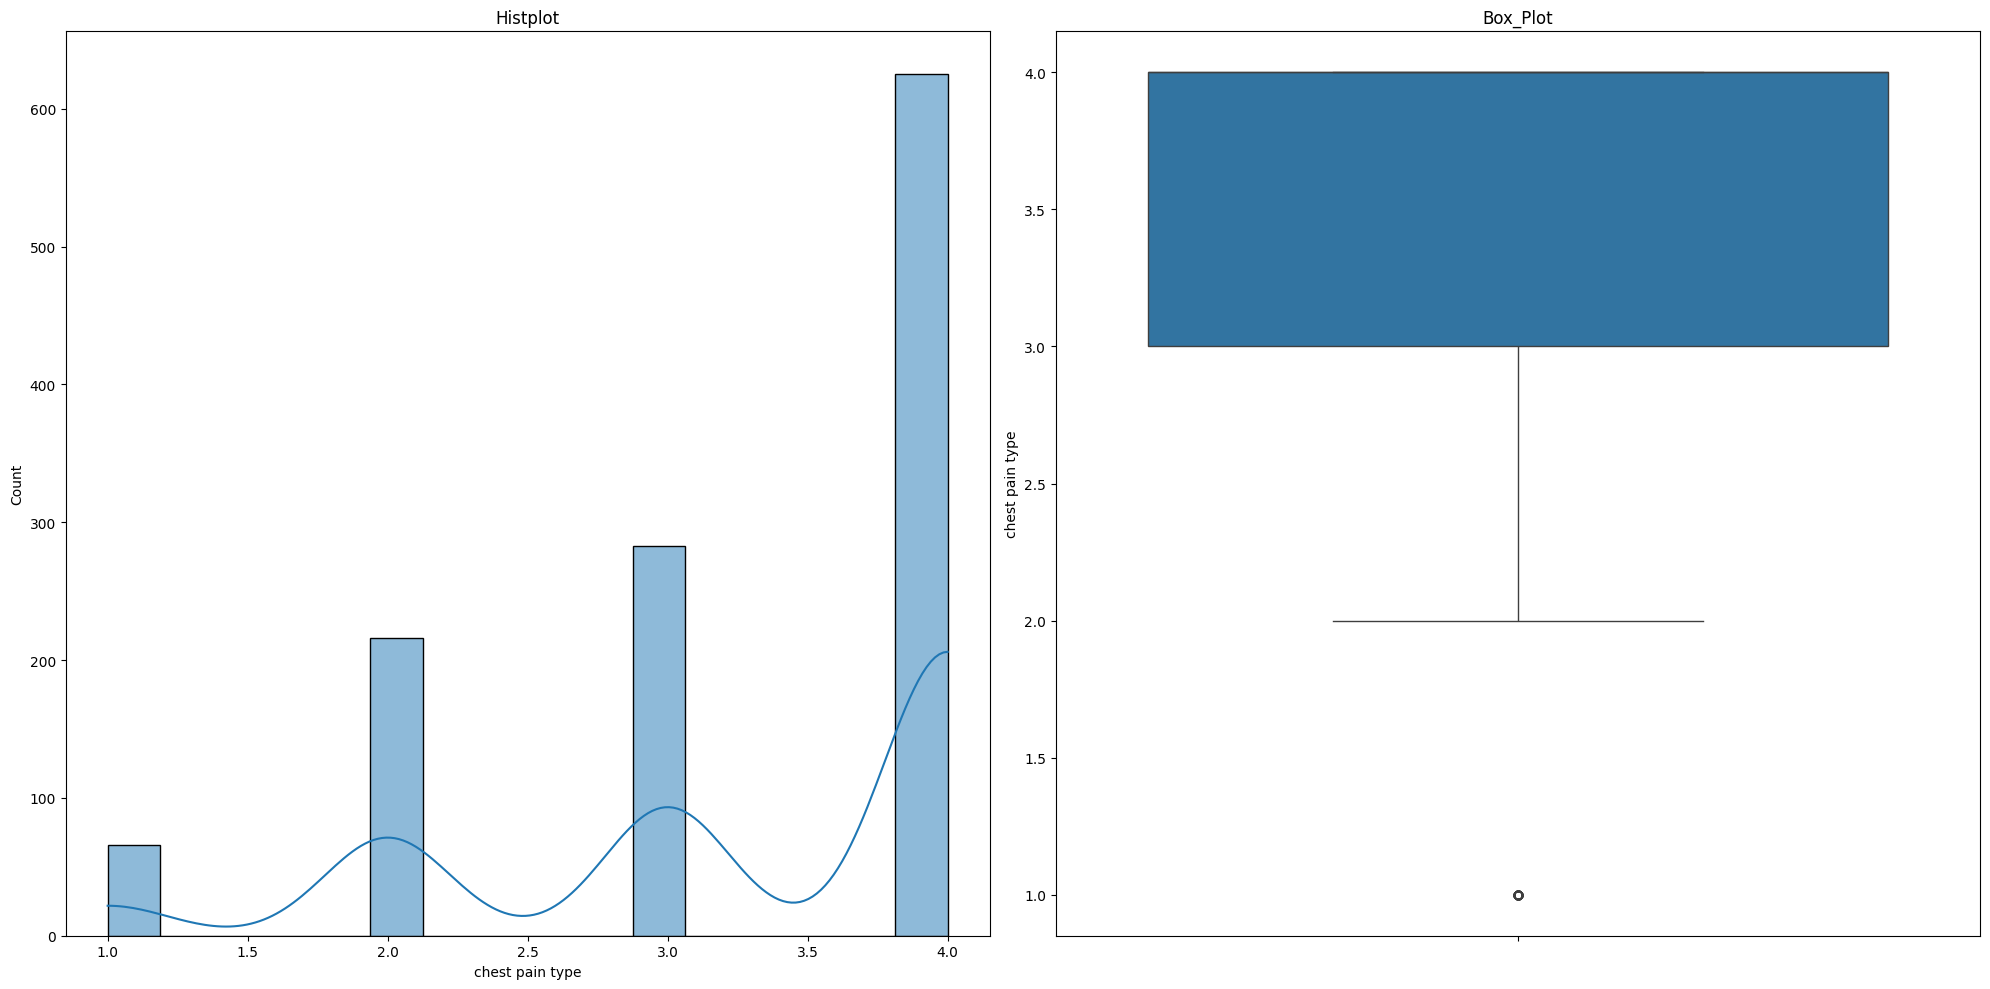

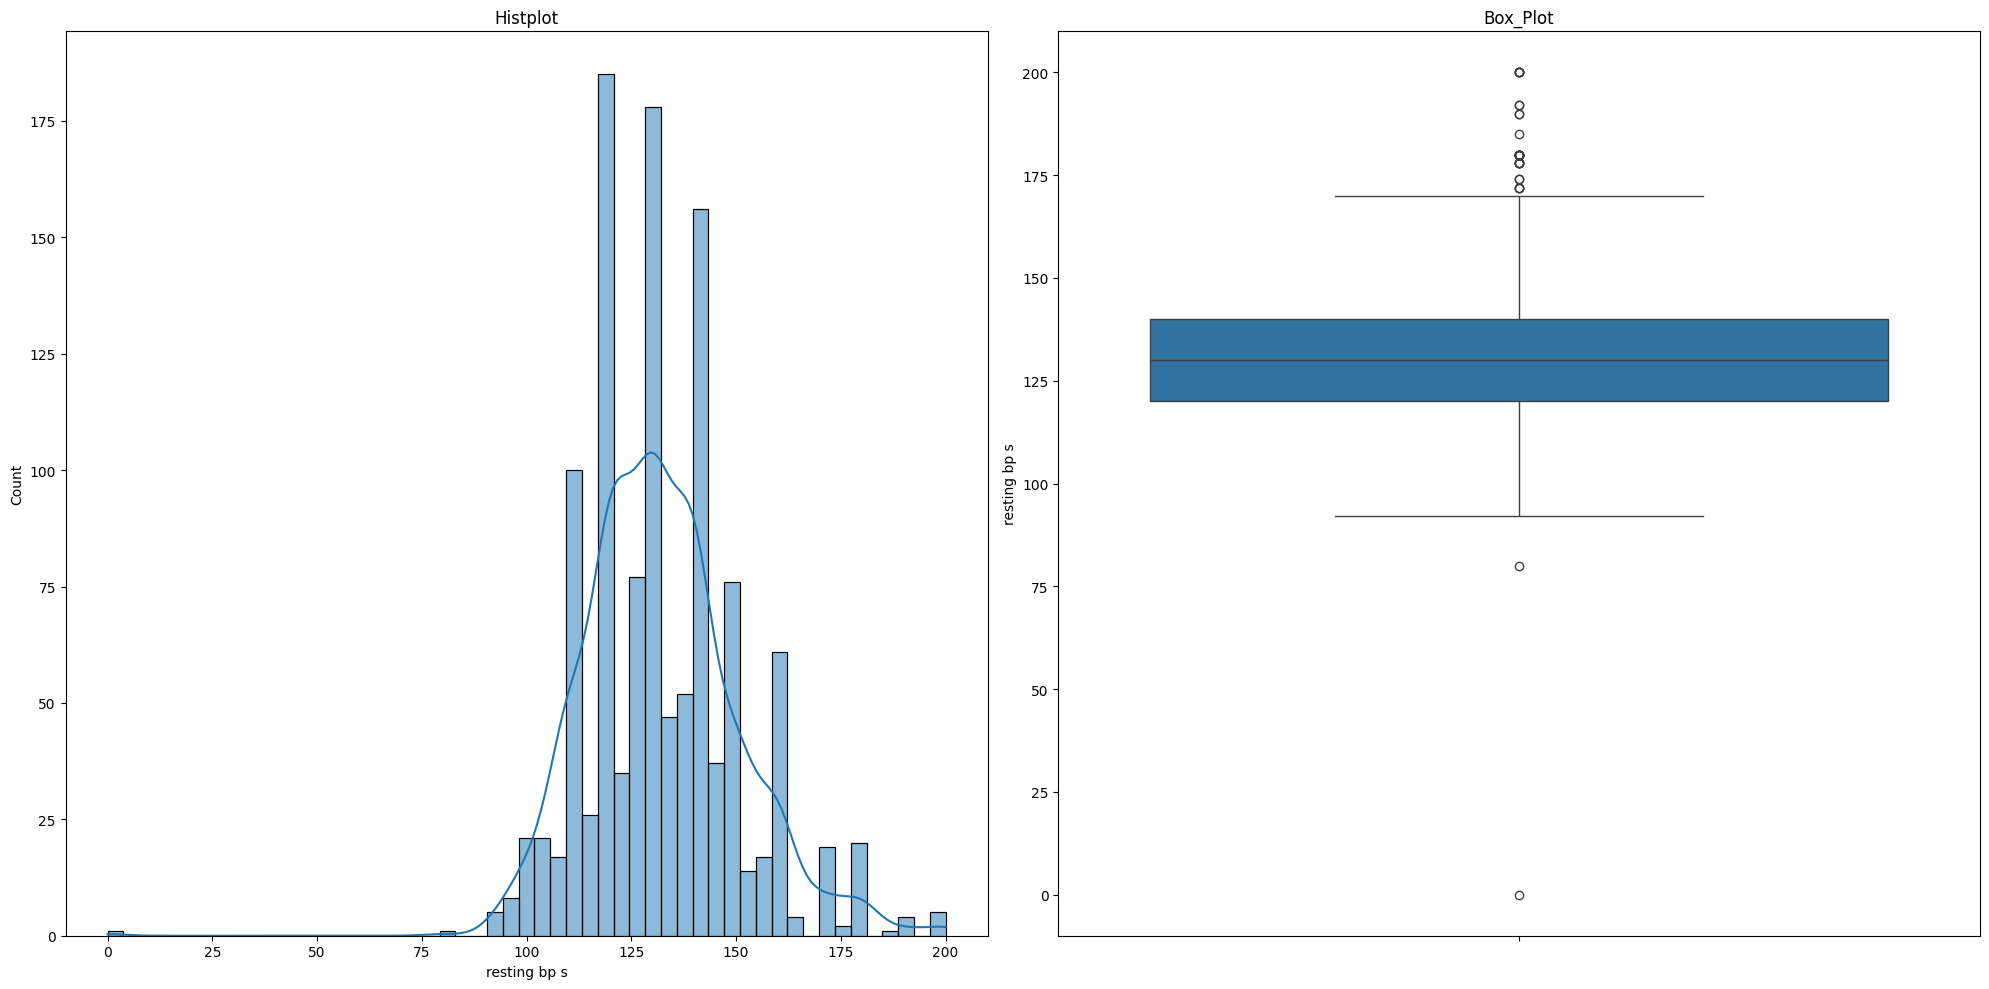

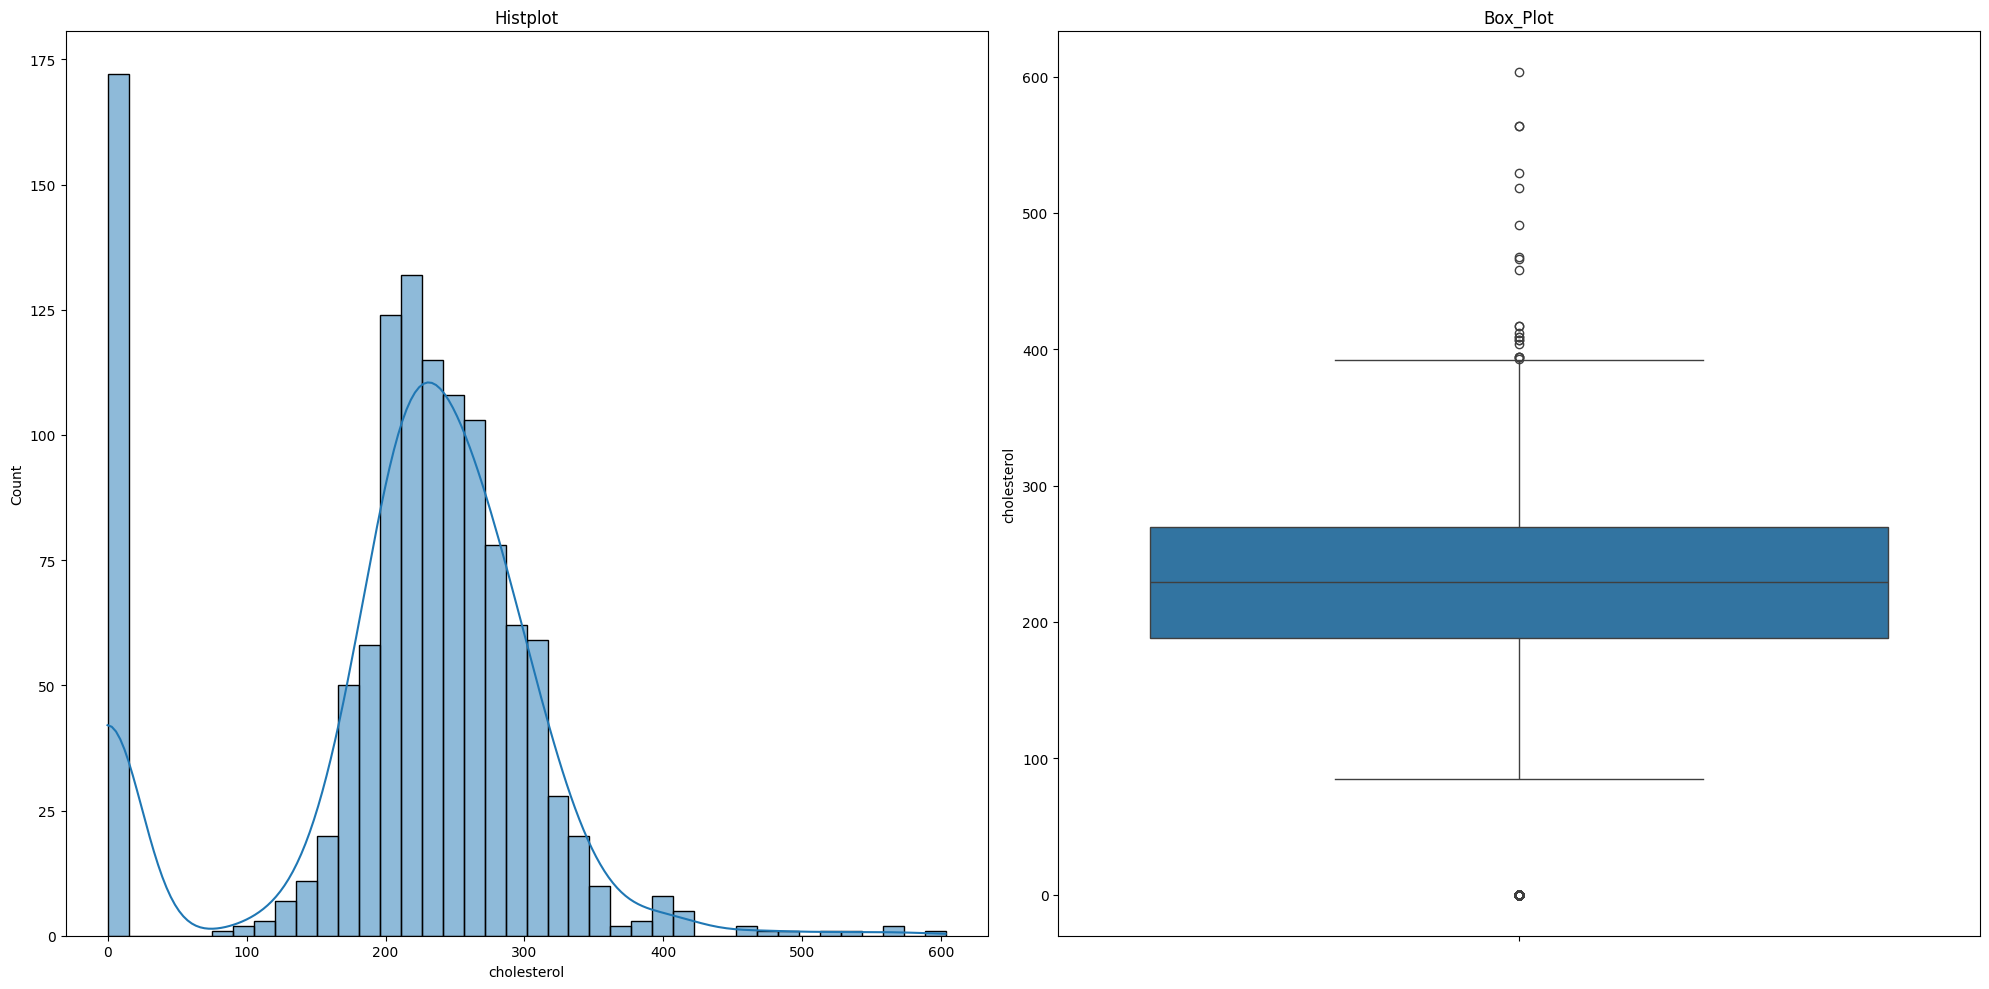

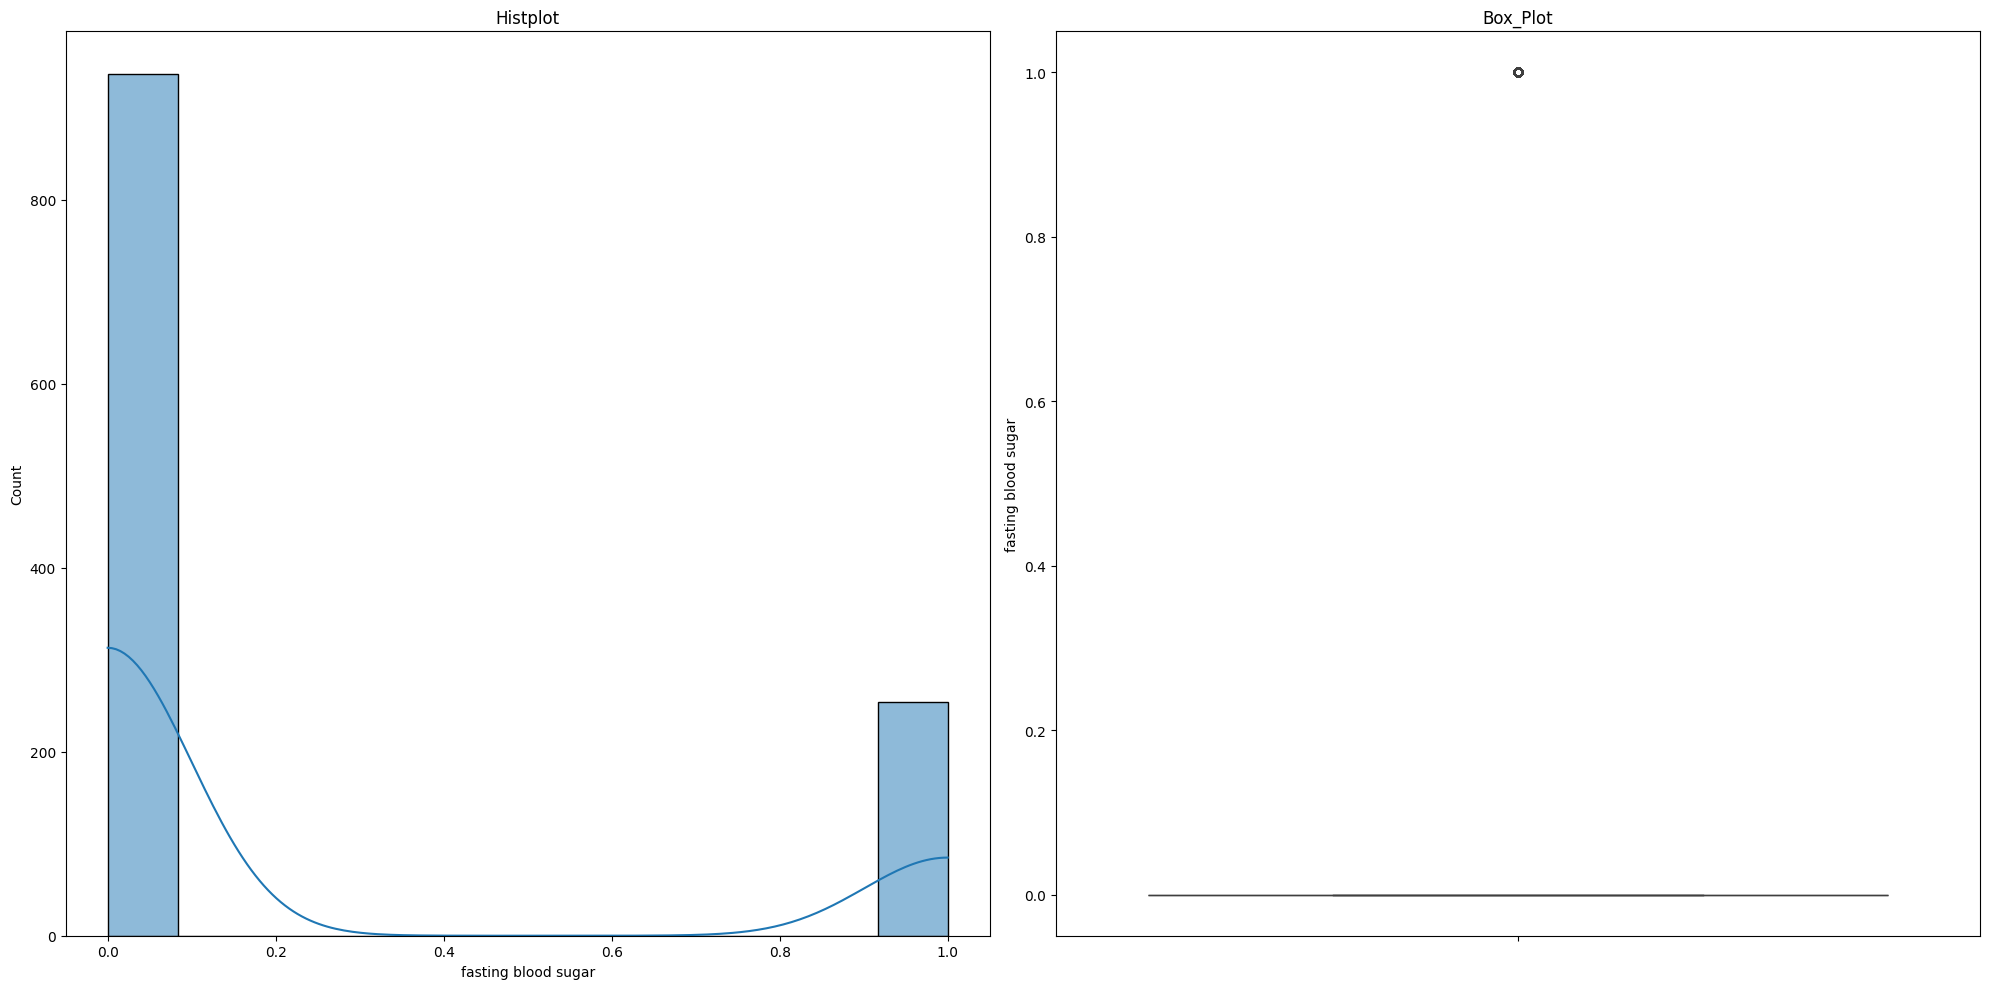

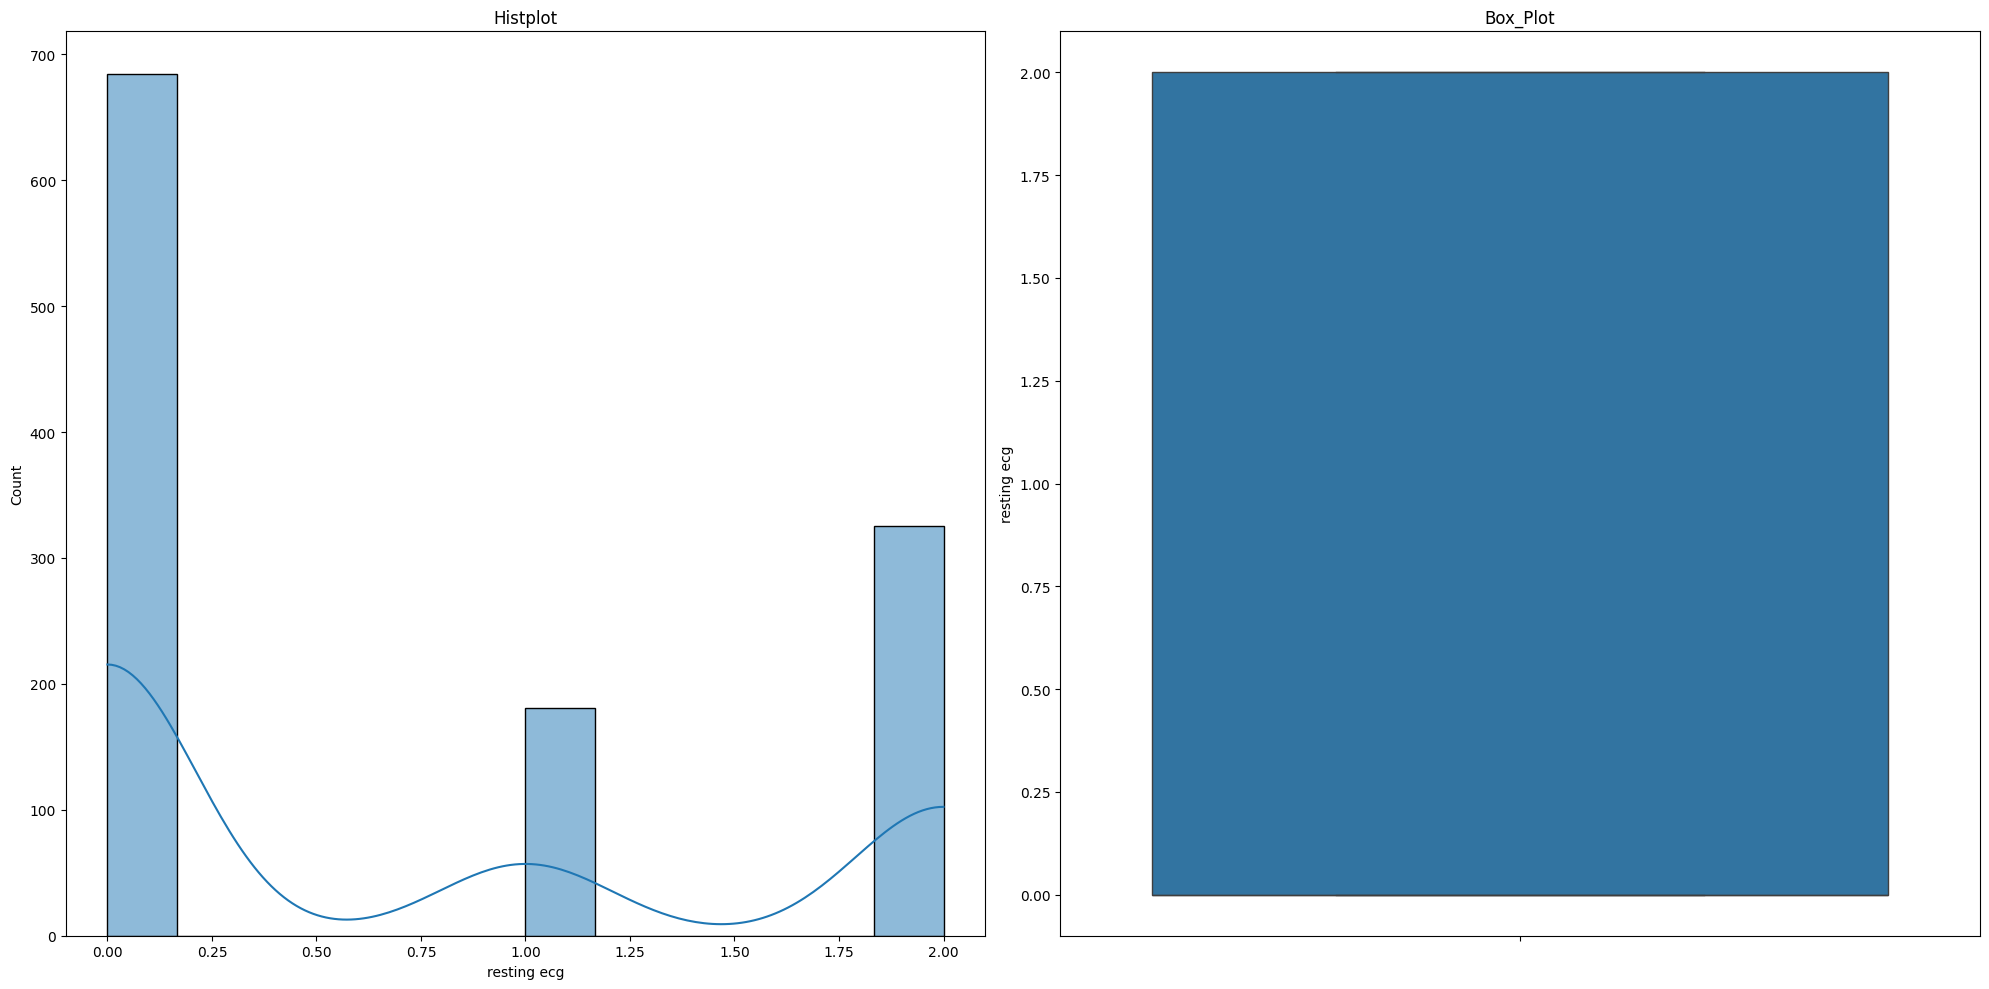

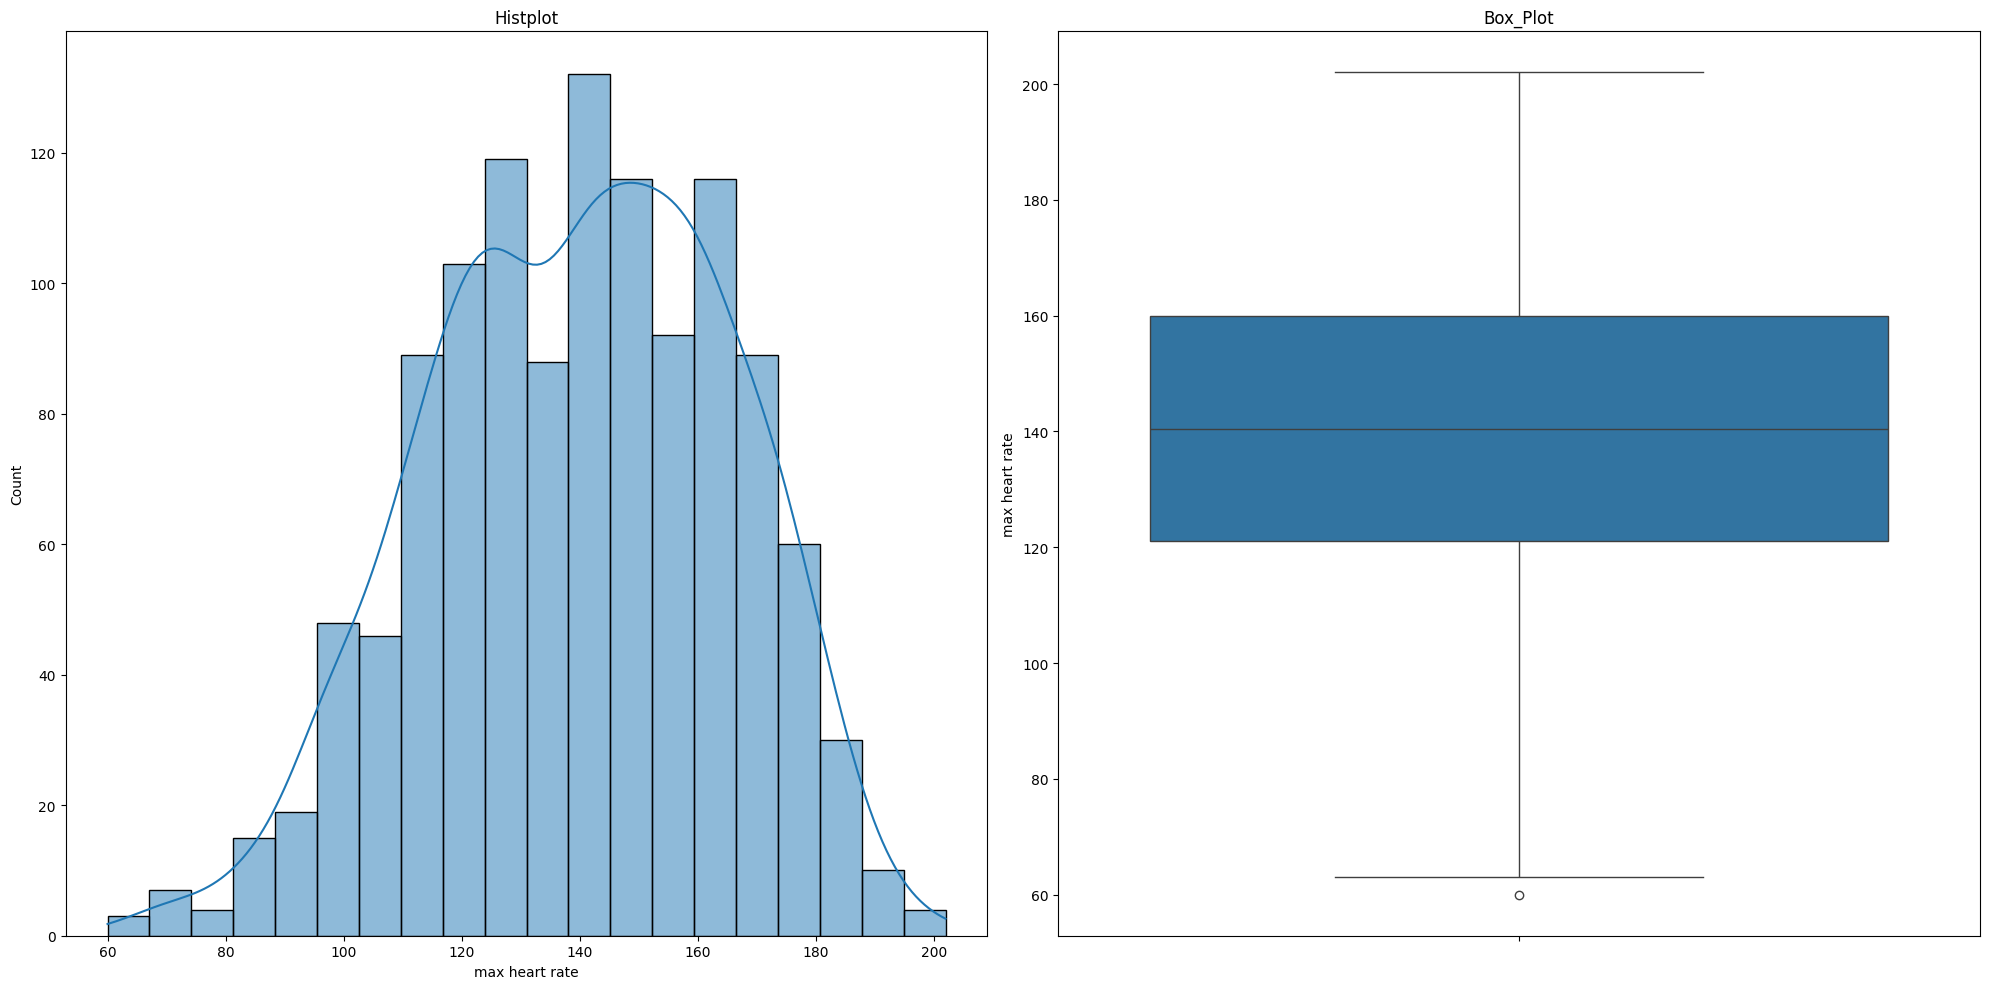

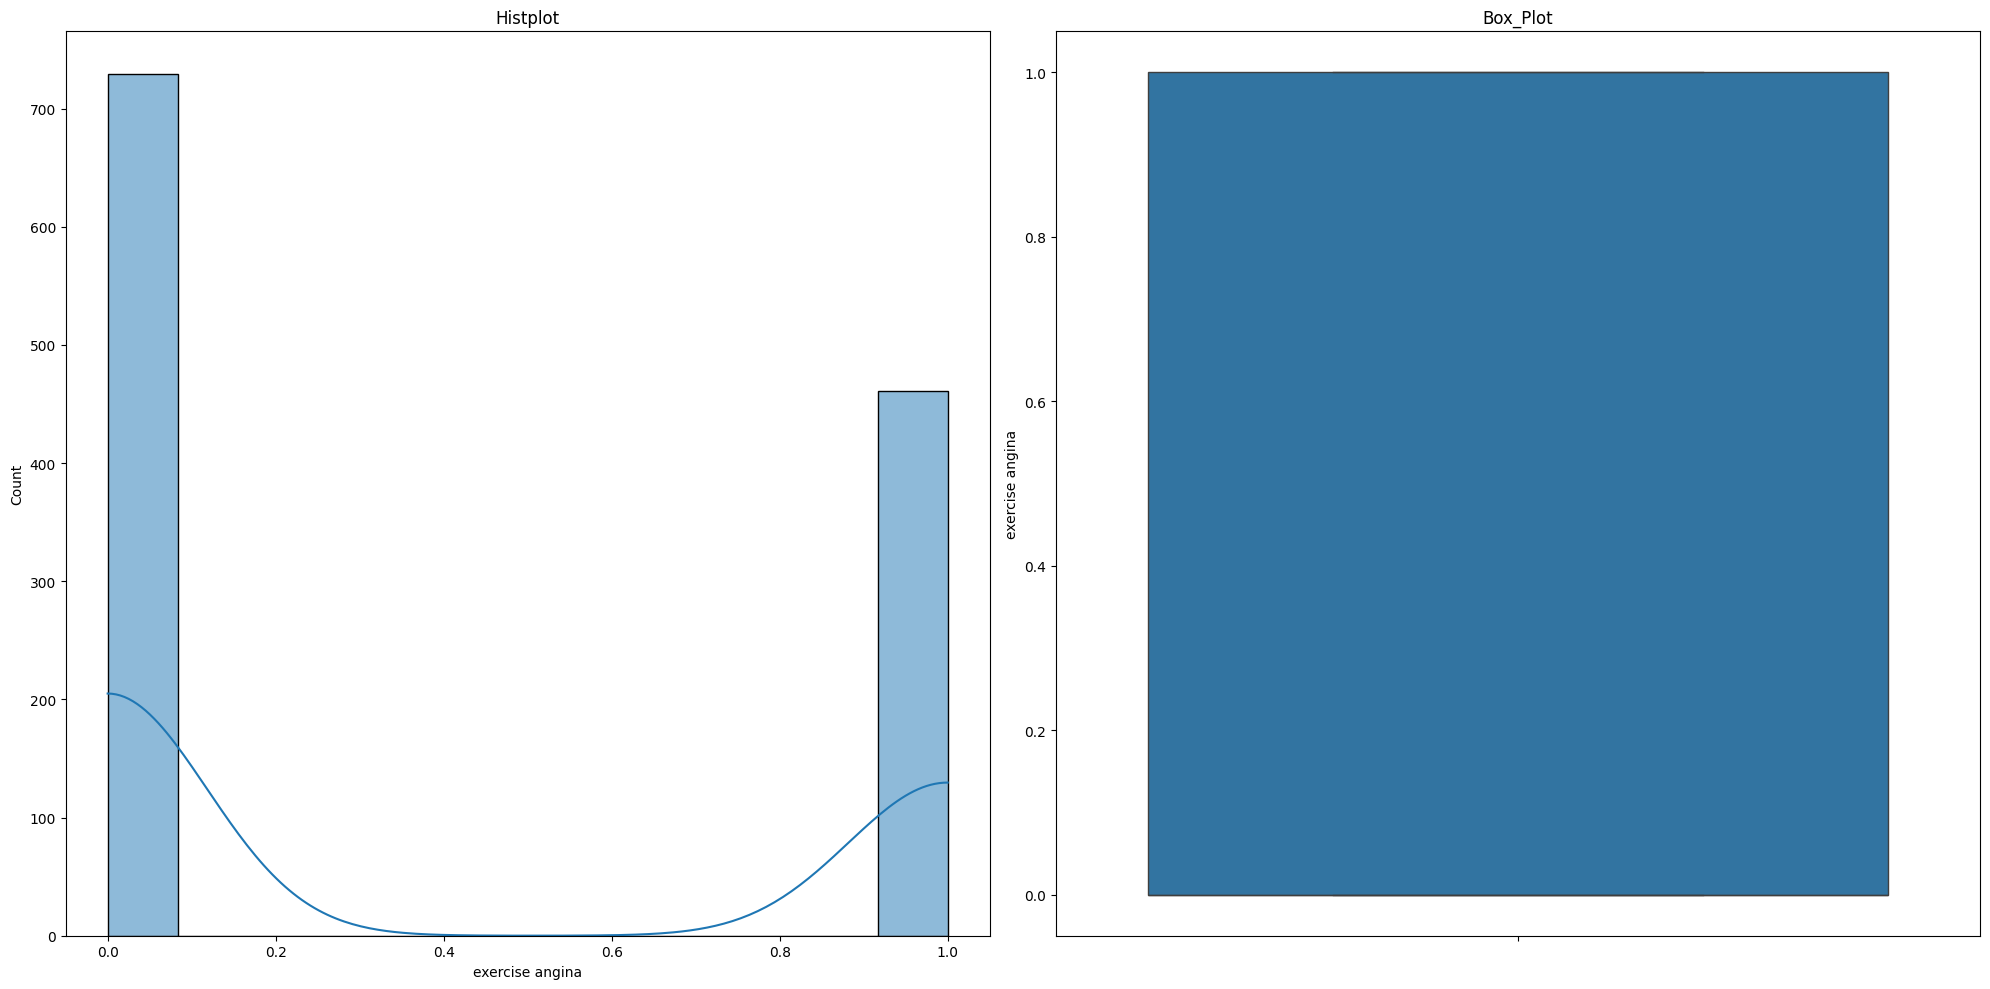

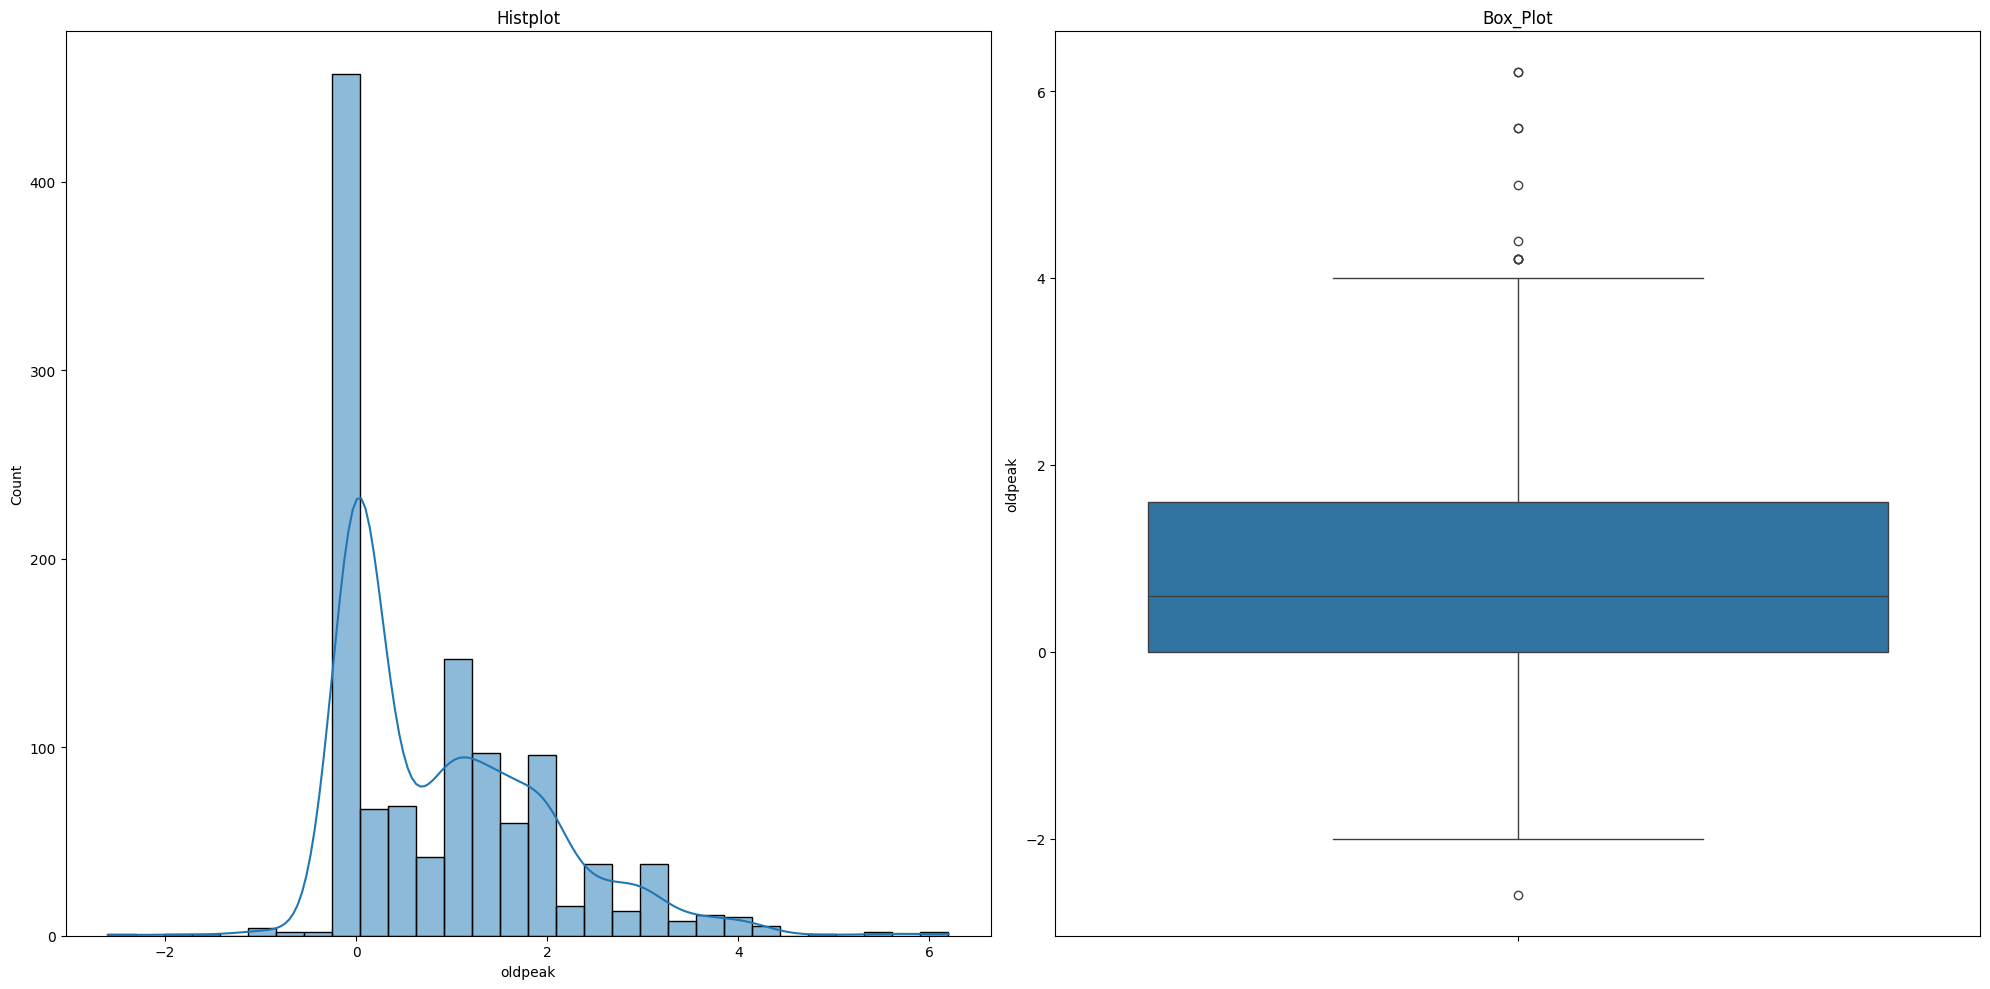

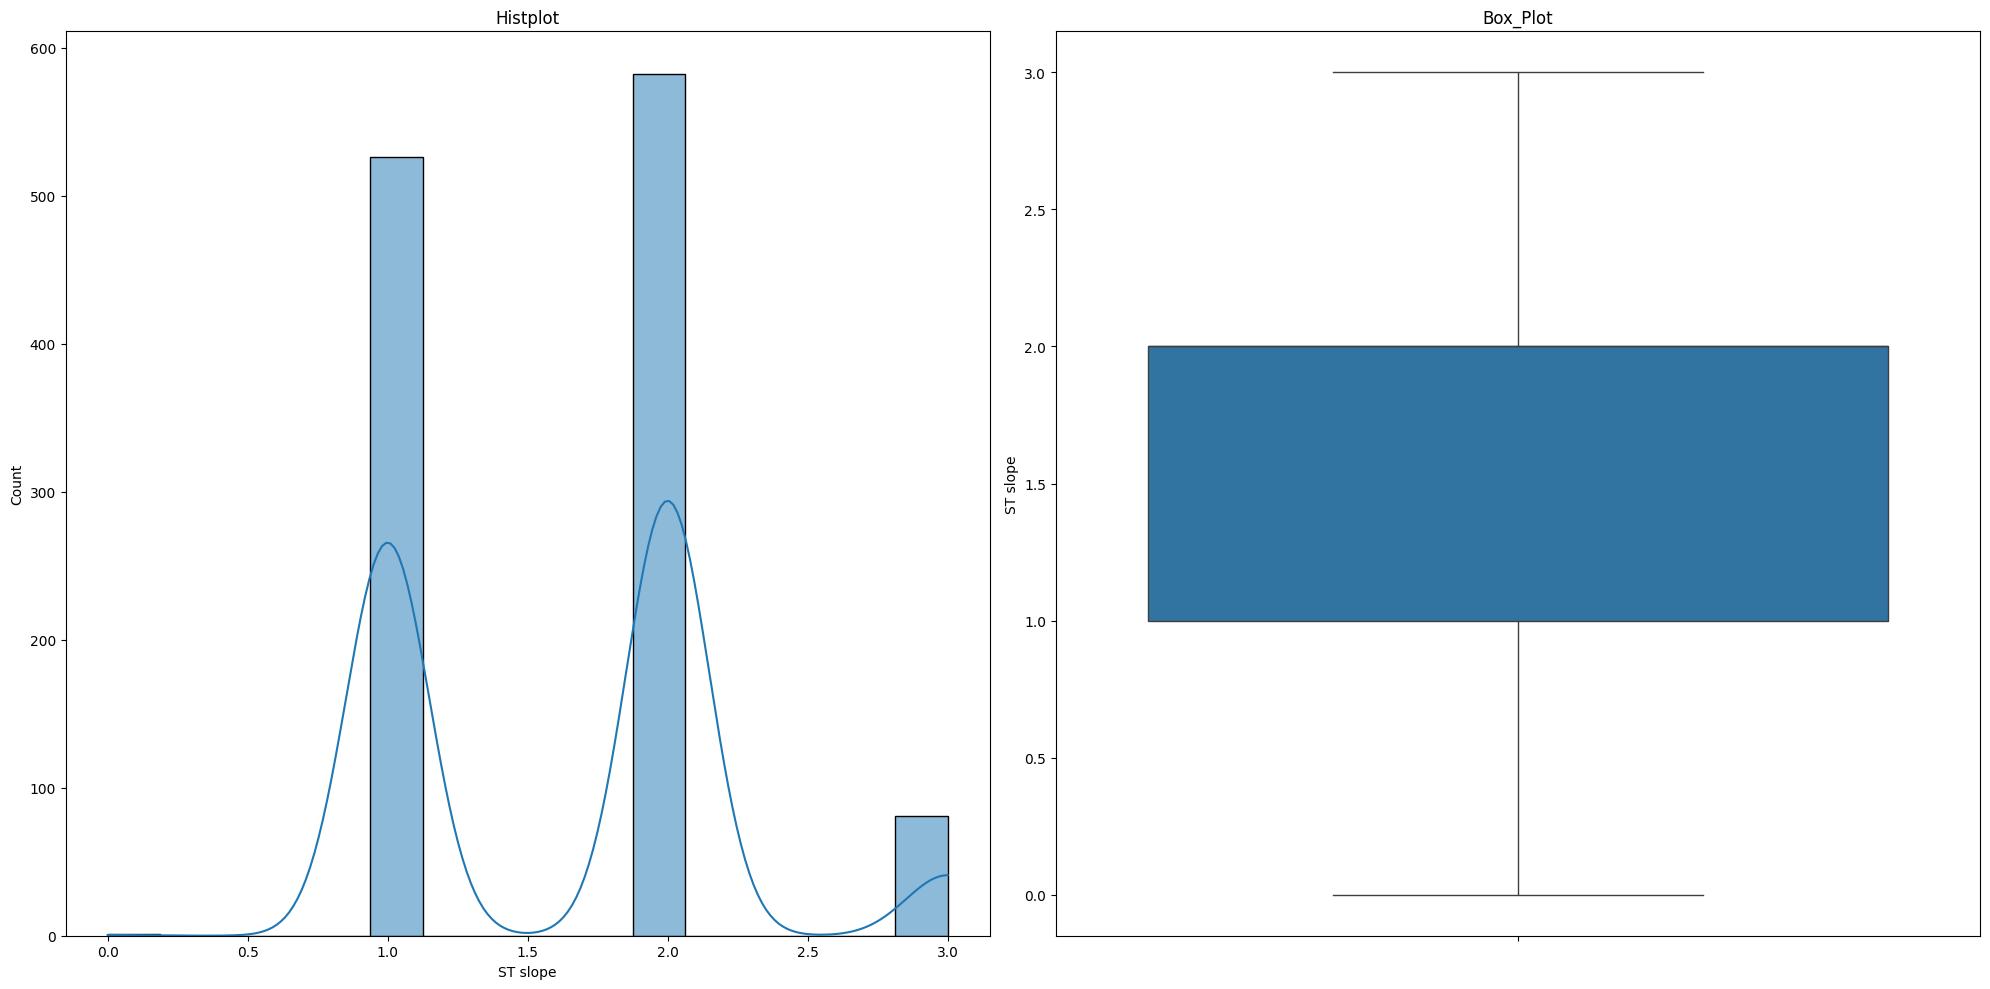

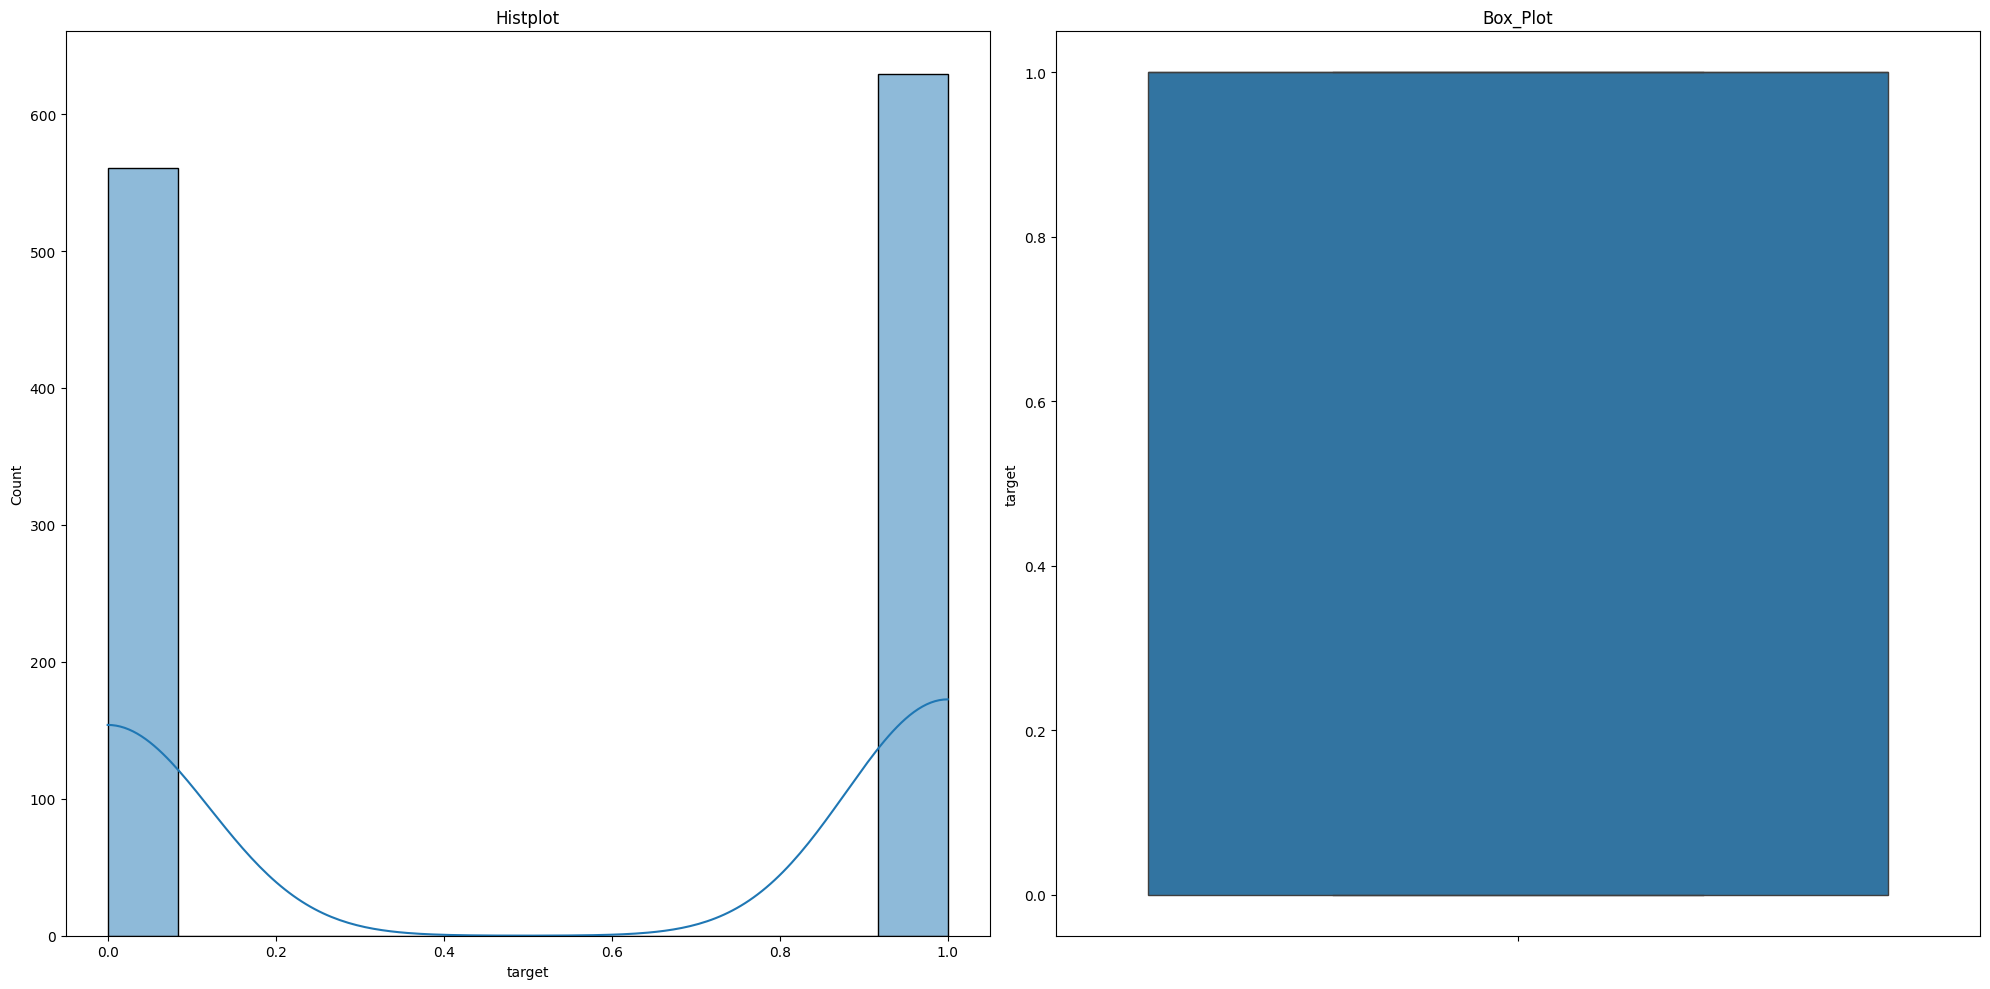

In [15]:
for cat in df.columns:
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
    sns.histplot(df[cat],ax=ax[0],kde=True)
    ax[0].set_title("Histplot")
    sns.boxplot(df[cat],ax=ax[1])
    ax[1].set_title("Box_Plot")
    plt.tight_layout()
    # plt.show()

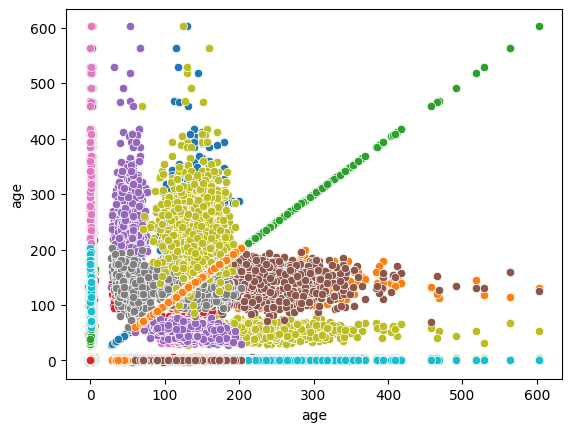

In [16]:
for i in df.columns:
    for j in df.columns:
        sns.scatterplot(data=df, x=i, y=j)
        # plt.show()

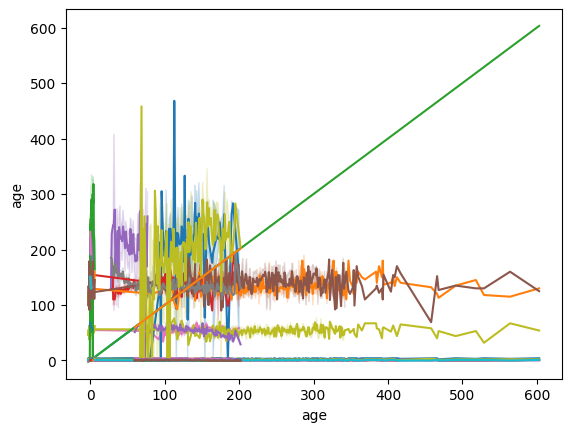

In [17]:
for i in df.columns:
    for j in df.columns:
        sns.lineplot(data=df, x=i, y=j)
        # plt.show()



<Axes: >

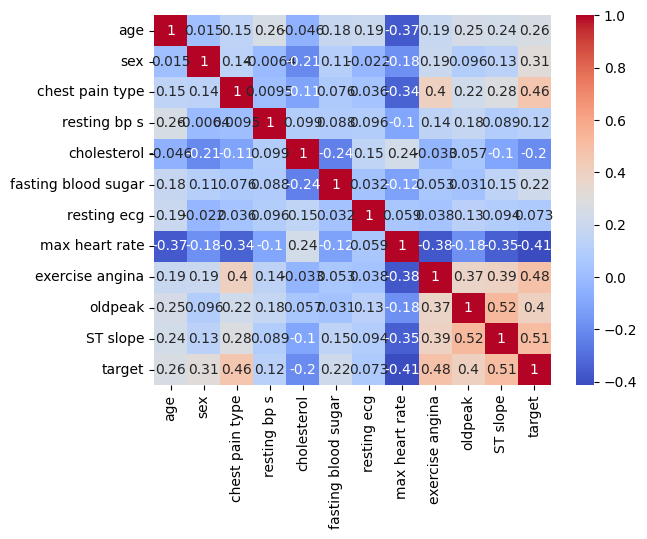

In [18]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


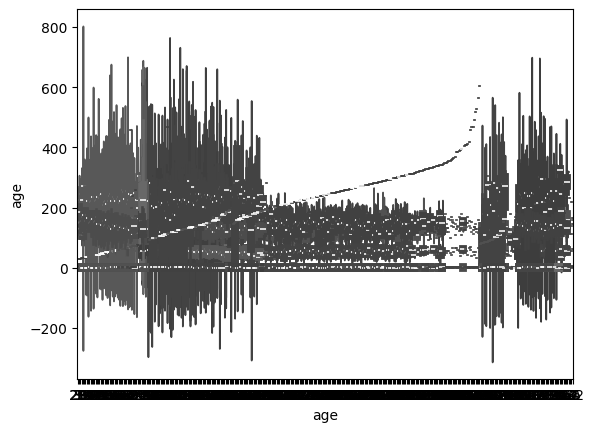

In [19]:
for i in df.columns:
    for j in df.columns:
        sns.violinplot(data=df, x=i, y=j)
        # plt.show()

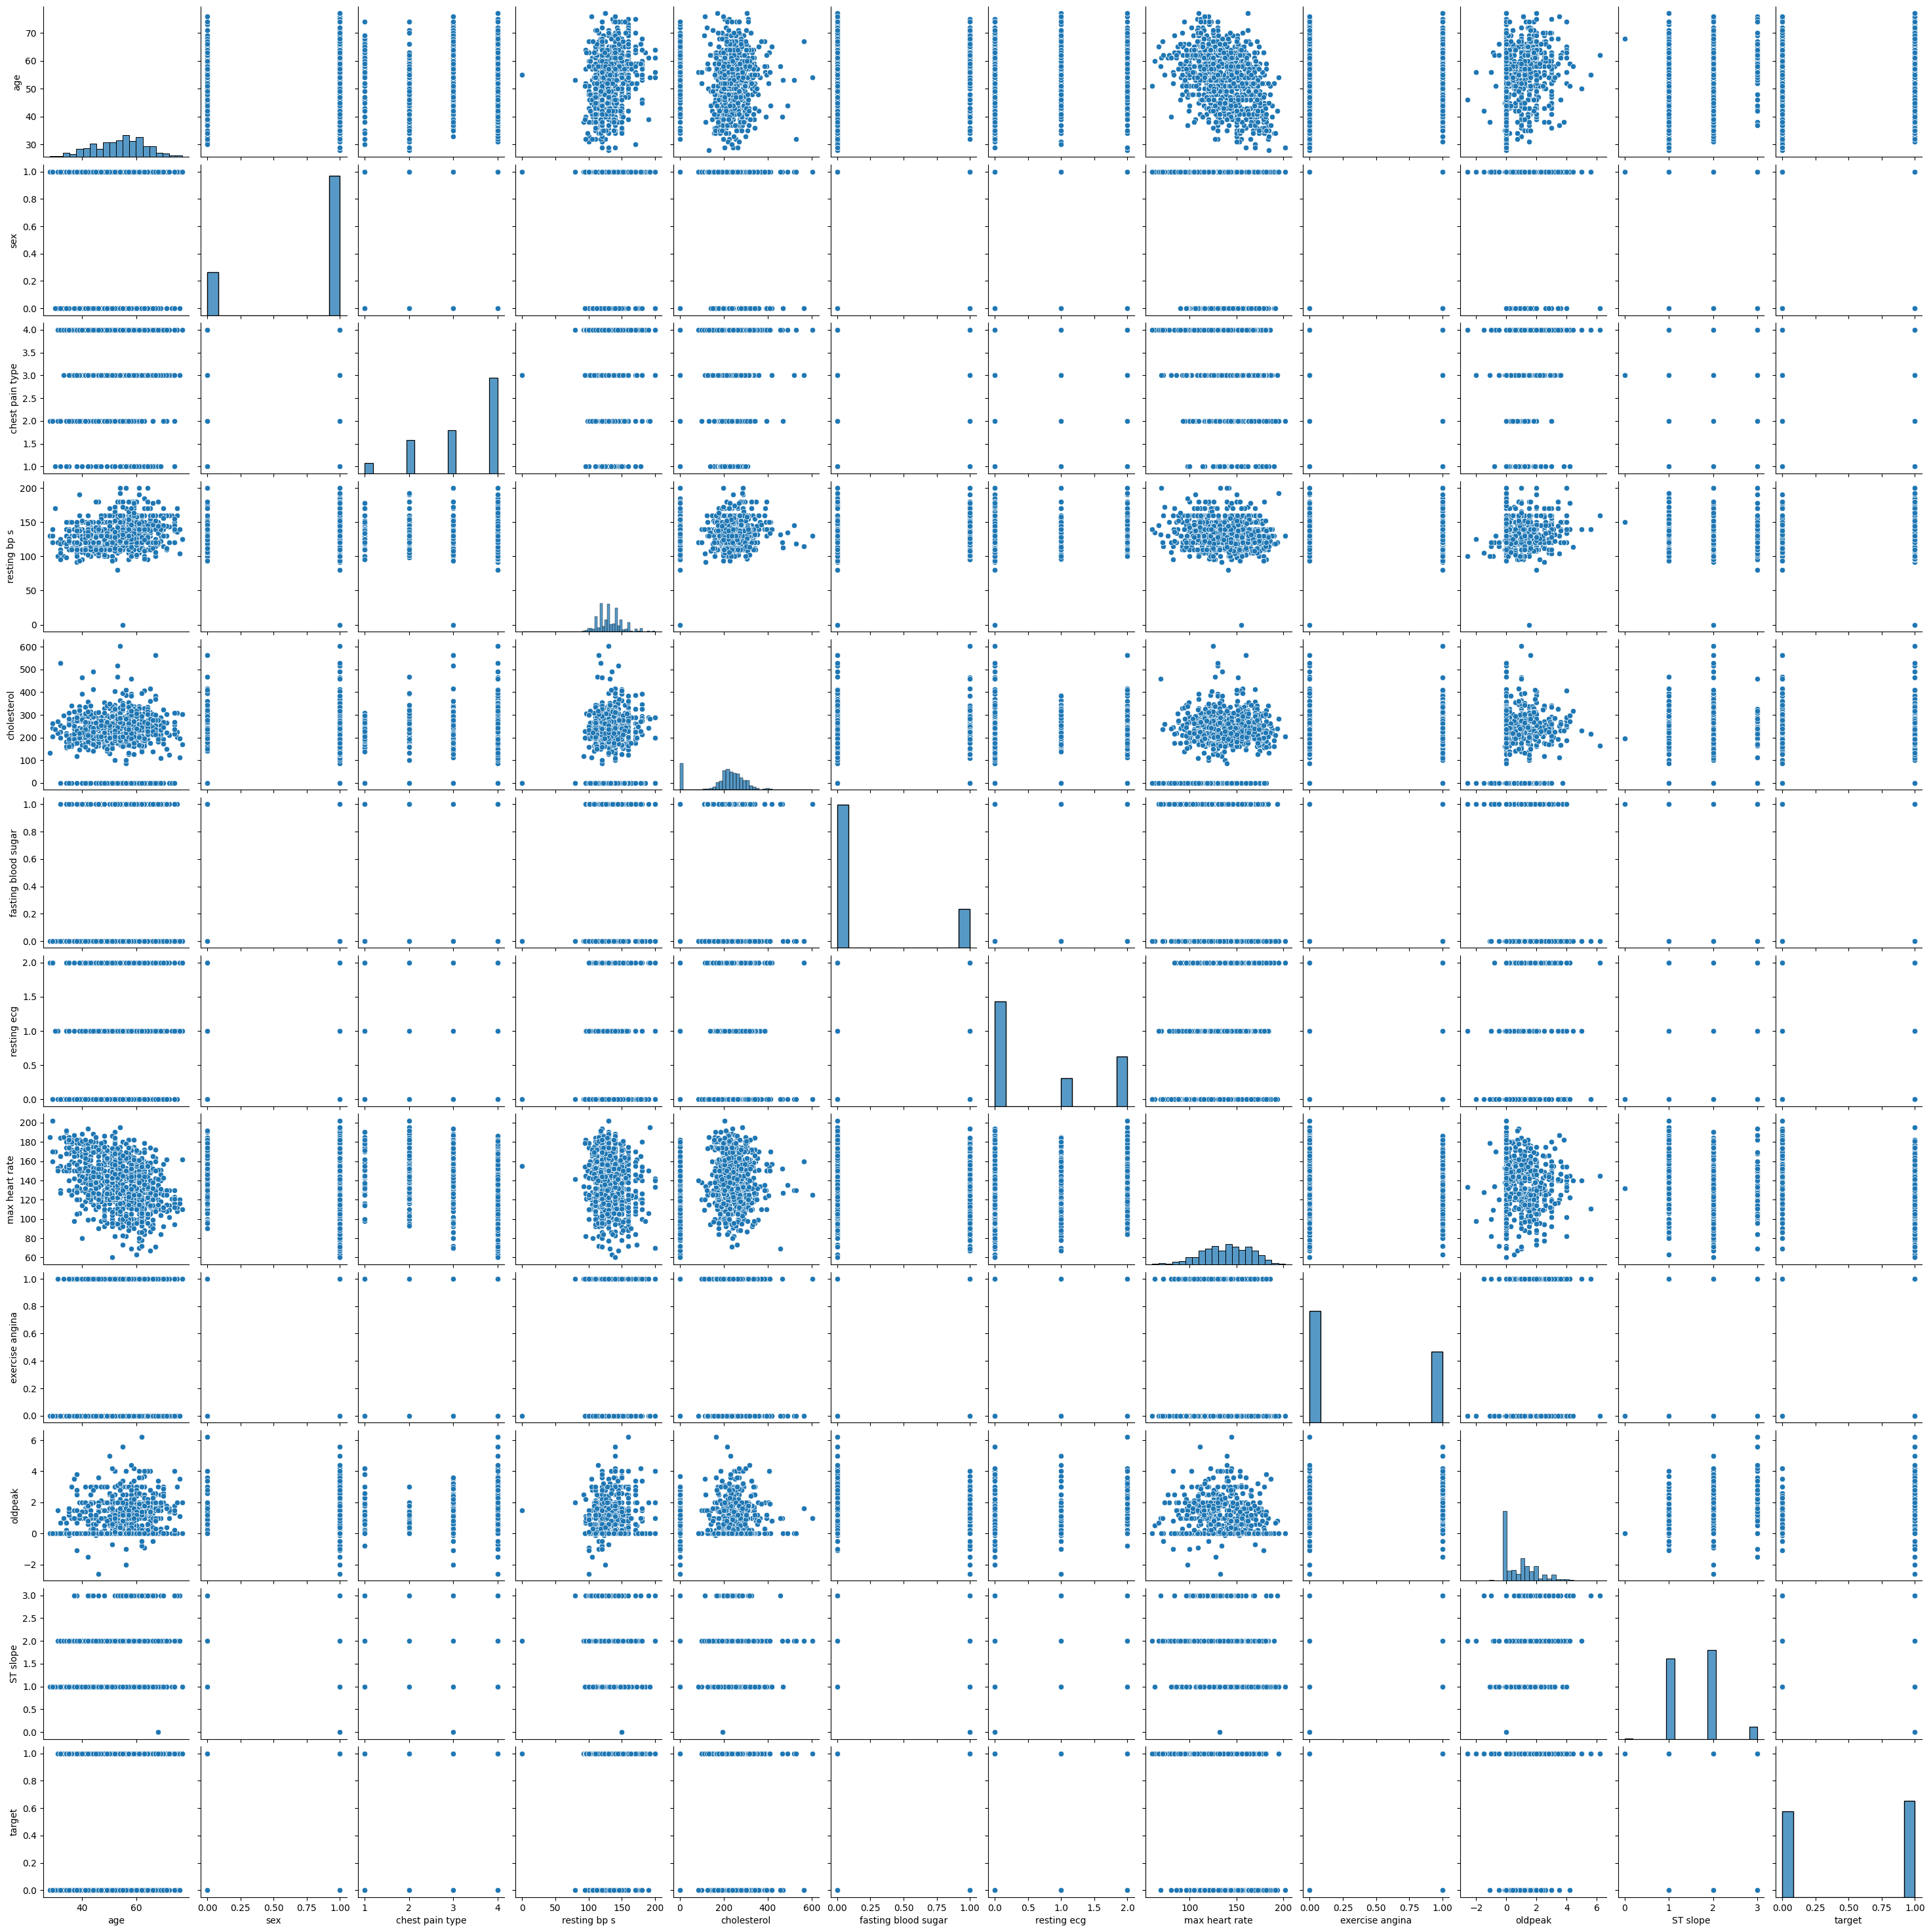

In [20]:
sns.pairplot(df)
